## **Lab 4: Multivariate Methods**

CS 412

***This lab can be conducted in groups or individually.***

In this lab, we will delve into multi-variate Gaussian distribution, including its inference, sampling, and visualization.  There are a lot of plotting in this lab, and they cannot be auto-graded.

***Deadline:***
**23:59, Oct 16**.


<font color='red'> Please refer to `Lab_Guideline.pdf` in the same Google Drive folder as this Jupyter notebook; the guidelines there apply to all the labs.</font>

To start, let us import the necessary packages.

In [26]:
# set up code for this experiment
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1)

## Problem 1: Exercise 4.1 of Alpaydin (4 pt){-}

Write the code that generates a Bernoulli sample with given parameter $p$, and
the code that calculates $\hat{p}$ from the sample.

The sampler will be based on the function `np.random.random_sample`, which returns (an array of) uniformly distributed samples from [0.0, 1.0).  To turn them into Bernoulli samples, just threshold with $p$.  Then use the resulting binary value to compute the estimate $\hat{p}$.  So we are done in three steps.

**Important:** for efficiency, you are **not** allowed to use loops in your implementation, meaning that you should not call `np.random.random_sample` to just return a single random number.

In [48]:
def ex4_1(p, nSample):
  """
  Inputs:
  - p: a real number, which specifies the parameter of Bernoulli
  - nSample: an integer which is the  number of samples to draw

  Output:
  - phat: the estimate of p from the samples
  """
  np.random.seed(1)
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  u = np.random.random_sample(nSample)
  bern = (u < p).astype(float)
  phat = float(bern.mean())
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  return phat

"""
Unit test
Should print: some value close to 0.2 (it's random)
"""
p = 0.2
nSample = 1000
phat = ex4_1(p, nSample)
print (phat)

0.203


## Problem 2: Exercise 4.3 of Alpaydin (23 pt){-}

Write the code that generates a real-valued normal sample with given $\mu$ and $\sigma$, and the code that calculates $m$ and $s$ from the sample. Do the same using the Bayes’ estimator assuming a Gaussian prior distribution for $μ$.

### 2.1 Implement the density function of a Gaussian distribution (4 pt) {-}

Write a function that, given the value of mean $\mu$ and standard deviation $\sigma$, computes the density of the univariate Gaussian distribution at $x$.  Here $x$ can be a vector, and the result should be a vector of the same size, with the $i$-th element being the density of x[i].

In [28]:
def nrmf(x, mu, sigma):
  '''
  Given mean mu and standard deviation sigma,
  compute the density of the univariate Gaussian distribution at x.
  Here x can be a vector, and the result should be a vector of the same size,
  with the i-th element being the density of x[i].
  Input:
    - x:    a 1-D numpy array specifying where to query the probability density
    - mu:   a real number specifying the mean of the Gaussian
    - sigma: a real number specifying the standard deviation of the Gaussian
  Outputs:
    - p:  a 1-D numpy array specifying the pdf at each element of x
  '''
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  coeff = 1 / (np.sqrt(2 * np.pi) * sigma)
  exponent = -0.5 * ((x - mu) / sigma) ** 2
  p = coeff * np.exp(exponent)

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  return p

'''
Unit test
We compare our result with the density computed by scipy
'''
import scipy.stats

x = np.random.random_sample(3)
mu = 1
sigma = 2
density = nrmf(x, mu, sigma)
ref_density = scipy.stats.norm(mu, sigma).pdf(x)
print(density)
print(ref_density)


[0.18845383 0.19916872 0.1979399 ]
[0.18845383 0.19916872 0.1979399 ]


### 2.2 Implement the Bayes’ estimator assuming a Gaussian prior distribution for $μ$. (6 pt) {-}

In a Gaussian distribution $N(\mu, \sigma^2)$, assume $\mu$ has a Gaussian prior $N$(priorMean, priorStd^2).  Then compute $\mu_{Bayes}$: the Bayes' estimate of mu by using the equation on slide 8 of Parametric Methods lecture slides: $E[\theta | X ] = ...$.

In [29]:
def bayes_estimator(x, sigma, priorMean, priorStd):
  '''
    Compute mu_bayes: the Bayes' estimate of mu by using the equation on slide 8
  Input:
    - x:    a 1-D numpy array specifying the samples from the Gaussian distribution
    - sigma: a real number specifying the standard deviation of the Gaussian
    - priorMean: a real number specifying the mean of the Gaussian prior on mu
    - priorStd: a real number specifying the standard deviation of the Gaussian prior on mu
  Outputs:
    - mu_post: a real number specifying the Bayes' estimate of mu by using the equation on slide 8
  '''

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  N = len(x)
  x_bar = np.mean(x)
  mu_post = ((N / sigma**2) * x_bar + (1 / priorStd**2) * priorMean) / ((N / sigma**2) + (1 / priorStd**2))

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return float(mu_post)

'''
Unit test
You should get 1.25
'''
np.random.seed(1)
sigma = 2
priorMean, priorStd = (-1, 2)
x = np.array([1, 2, 3])
bayes_estimator(x, sigma, priorMean, priorStd)

1.25

### 2.3  Do the following computation and plotting (8 pt) {-}

1. Plot the density function of $N(\mu, \sigma^2)$ with the $x$-axis ranging in `xrange` (an input argument)

2. Draw $N$ samples from $N(\mu, \sigma^2)$ using `np.random.normal`.  In the same figure from item 1, plot the $N$ samples in by `plt.scatter`. Each sample $x_i$ will lead to a red point at coordinate $(x_i, 0)$ ($y$-axis is $0$).

3. Apply maximum-likelihood estimation (MLE) on these $N$ samples to estimate the $\mu$ as $\mu_{MLE}$ and $\sigma$ as $\sigma_{MLE}$.  Then plot the density function of $N(\mu_{MLE}, \sigma_{MLE}^2)$ in the same plot as item 1.

4. Call `bayes_estimator` you implemented before by using the $N$ samples and a prior Gaussian with mean `priorMean` and standard deviation `priorStd` (both are input arguments).  Denote the Bayes estimate of $\mu$ as $\mu_{Bayes}$.

5. Plot the density function of $N(\mu_{Bayes}, \sigma^2)$ in the same figure as item 1.  Note we do not consider a Bayes estimate of $\sigma$, and will just directly use the given $\sigma$ for plotting.  This is different from item 3 above.

Make sure that the three curves in the plot use different colors and line styles.  At a good position, put the legend as "Actual", "MLE", and "Bayes".

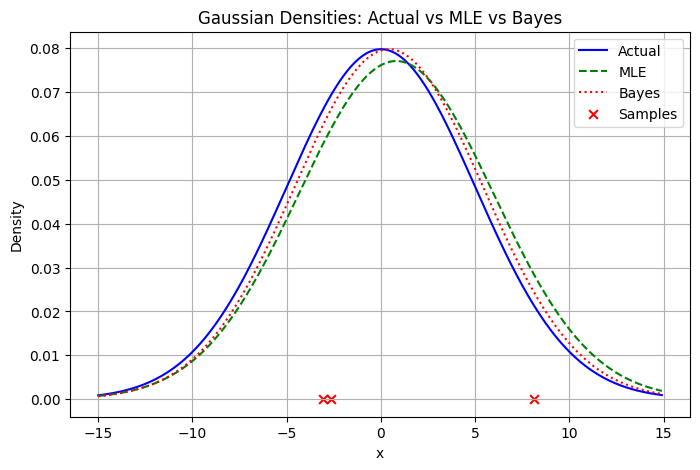

In [30]:
def ex4_3(xrange, mu, sigma, priorMean, priorStd, N):
  '''
  Inputs:
    - xrange: a 1-D numpy array specifying the range of x to make plots
    - mu: a real number as the mean of the Gaussian
    - sigma: a real number as the standard deviation of the Gaussian
    - N: an integer specifying how many samples to draw
  Outputs: nil
  '''
  np.random.seed(1)

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  p_actual = nrmf(xrange, mu, sigma)
  samples = np.random.normal(mu, sigma, N)
  mu_MLE = np.mean(samples)
  sigma_MLE = np.std(samples, ddof=0)   # MLE uses population std (ddof=0)
  p_MLE = nrmf(xrange, mu_MLE, sigma_MLE)
  mu_Bayes = bayes_estimator(samples, sigma, priorMean, priorStd)
  p_Bayes = nrmf(xrange, mu_Bayes, sigma)
  plt.figure(figsize=(8,5))
  plt.plot(xrange, p_actual, label="Actual", color='blue', linestyle='-')
  plt.plot(xrange, p_MLE, label="MLE", color='green', linestyle='--')
  plt.plot(xrange, p_Bayes, label="Bayes", color='red', linestyle=':')
  plt.scatter(samples, np.zeros_like(samples), color='red', s=40, marker='x', label='Samples')
  plt.title("Gaussian Densities: Actual vs MLE vs Bayes")
  plt.xlabel("x")
  plt.ylabel("Density")
  plt.legend()
  plt.grid(True)
  plt.show()
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

'''
This is the real test you will be graded on:
'''
mu, sigma = (0, 5)
priorMean, priorStd = (mu, 3)
x_start, x_end, step= (mu - 3*sigma, mu + 3*sigma, 0.1)
xrange = np.arange(x_start, x_end, step)
N = 3
ex4_3(xrange, mu, sigma, priorMean, priorStd, N)


### 2.4 Call `ex4_3` with the same input arguments as before, but now set $N$ to $1000$  (5 pt) {-}

Discuss briefly how the new plot changes from  the previous one by writing in the paragraph below.  Pay attention to $\mu$, $\mu_{MLE}$, and $\mu_{Bayes}$.

<font color='red'> My observation is: (type the result here)</font>


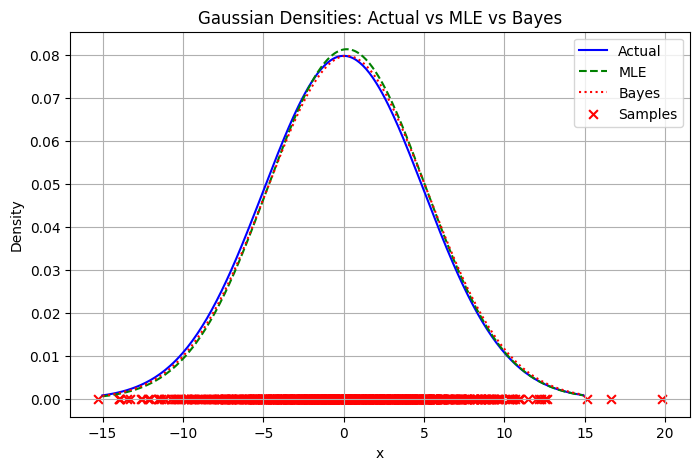

In [31]:
'''
This is the real test you will be graded on:
'''
mu, sigma = (0, 5)
priorMean, priorStd = (mu, 3)
x_start, x_end, step= (mu - 3*sigma, mu + 3*sigma, 0.1)
xrange = np.arange(x_start, x_end, step)
N = 1000
ex4_3(xrange, mu, sigma, priorMean, priorStd, N)

###Observation:

When the sample size increases to N = 1000, both the MLE estimate (μₘₗₑ) and the Bayes estimate (μ_Bayes) become almost the same as the true mean (μ = 0). The three curves: Actual, MLE, and Bayes overlap almost perfectly, thereby demonstrating that with a sufficiently large dataset, the effect of the prior becomes negligible, and the data dominates the estimation.

Unlike the smaller sample size cases (e.g., N = 10 or 50), the Bayes estimator does not provide a visible correction because the likelihood is already very strong. As N → ∞, the posterior mean converges to the MLE, and both to the true parameter value.

Conclusion: An increase in sample size reduces estimation variance profoundly, resulting in nearly identical MLE and Bayes estimators, both of which become highly precise.


## Problem 3: Exercise 4.6 of Alpaydin (26 pt){-}

For a two-class problem, suppose the likelihood models for both classes are Gaussians, and their covariances are different.  Visualize the posterior probability, and use parametric classification to estimate the discriminant points.

### 3.1 Compute the likelihood and posterior probability (8 pt) {-}

Let $p(x|C_1) = N(\mu_1, \sigma_1^2)$ and $p(x|C_2) = N(\mu_2, \sigma_1^2)$.  On the points specified by `xrange`, compute likelihood $p(x|C_1)$ and posterior $p(C_1|x)$, along with $p(x|C_2)$ and $p(C_2|x)$.

Note, your code should not have any for loop because the function `nrmf` you implemented before can take an array as the first input argument.

In [32]:
def comp_posterior(mu1, sigma1, p1, mu2, sigma2, xrange):
  """
  Compute the likelihood and posterior proability for x values in xrange
  Inputs:
  - mu1: a real number specifying the mean of Gaussian distribution p(x|C1)
  - sigma1: a real number specifying the standard deviation of Gaussian distribution p(x|C1)
  - p1: a real number in [0, 1] specifying the prior probability of C1, i.e., P(C1)
        P(C2) will be automatically inferred by 1 - p1.
  - mu2: a real number specifying the mean of Gaussian distribution p(x|C2)
  - sigma2: a real number specifying the standard deviation of Gaussian distribution p(x|C2)
  - xrange: a 1-D numpy array specifying the range of x to evaluate likelihood and posterior

  Outputs:
  - l1: a 1-D numpy array in the same size as xrange, recording p(x|C1)
  - post1: a 1-D numpy array in the same size as xrange, recording p(C1|x)
  - l2: a 1-D numpy array in the same size as xrange, recording p(x|C2)
  - post2: a 1-D numpy array in the same size as xrange, recording p(C2|x)
  """
  np.random.seed(1)

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  l1 = nrmf(xrange, mu1, sigma1)      # p(x | C1)
  l2 = nrmf(xrange, mu2, sigma2)      # p(x | C2)
  p2 = 1 - p1
  px = l1 * p1 + l2 * p2
  post1 = (l1 * p1) / px              # p(C1 | x)
  post2 = (l2 * p2) / px              # p(C2 | x)

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  return l1, post1, l2, post2

"""
Unit test below.
Should print:
[0.00443185 0.05399097 0.24197072]
[0.9999999  0.87502269 0.10818288]
[2.97030006e-10 5.14092999e-03 1.32980760e+00]
[1.00532537e-07 1.24977307e-01 8.91817115e-01]
"""
mu1 = 3.0
sigma1 = 1.0
p1 = 0.4
mu2 = 2.0
sigma2 = 0.3
xrange = np.arange(0,3,1)

l1, post1, l2, post2 = comp_posterior(mu1, sigma1, p1, mu2, sigma2, xrange)
print(l1)
print(post1)
print(l2)
print(post2)

[0.00443185 0.05399097 0.24197072]
[0.9999999  0.87502269 0.10818288]
[2.97030006e-10 5.14092999e-03 1.32980760e+00]
[1.00532537e-07 1.24977307e-01 8.91817115e-01]


### 3.2 Compute the two discriminant points (8 pt) {-}

Use the results in Exercise 4.4 of Alpaydin's book to compute, analytically, the two values of $x$ such that  $p(C_1|x) = p(C_2|x)$.  Denote them as $x_1$ and $x_2$.

In [33]:
def find_dpoint(mu1, sigma1, p1, mu2, sigma2):
  '''
  Find the discriminant points of two Gaussians
  Inputs:
  - mu1: a real number specifying the mean of Gaussian distribution p(x|C1)
  - sigma1: a real number specifying the standard deviation of Gaussian distribution p(x|C1)
  - p1: a real number in [0, 1] specifying the prior probability of C1, i.e., P(C1)
        P(C2) will be automatically inferred by 1 - p1.
  - mu2: a real number specifying the mean of Gaussian distribution p(x|C2)
  - sigma2: a real number specifying the standard deviation of Gaussian distribution p(x|C2)
  Output:
  - x: a 1-D numpy array with two elements, recording the discriminant points
  '''

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  p2 = 1 - p1
  A = (1/(2*sigma2**2)) - (1/(2*sigma1**2))
  B = (-mu2/(sigma2**2)) + (mu1/(sigma1**2))
  C = (mu2**2)/(2*sigma2**2) - (mu1**2)/(2*sigma1**2) + np.log((p1 * sigma2) / (p2 * sigma1))
  if np.isclose(A, 0.0):
    x = -C / B
    return np.array([x, x])

  disc = B**2 - 4*A*C
  disc = max(disc, 0.0)
  x1 = (-B + np.sqrt(disc)) / (2*A)
  x2 = (-B - np.sqrt(disc)) / (2*A)

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  return np.array([x1, x2])

"""
Unit test below.
Should print:
[2.55457643 1.24762137]
"""
mu1 = 3.0
sigma1 = 1.0
p1 = 0.4
mu2 = 2.0
sigma2 = 0.3

dpoint = find_dpoint(mu1, sigma1, p1, mu2, sigma2)
print(dpoint)

[2.55457643 1.24762137]


### 3.3  Plot using the previous functions (10 pt) {-}

1. Plot the density of $p(x|C_1)$ and $p(x|C_2)$ in one plot, with the $x$-axis range being the input argument `xrange`.  Use **dashed** line style ('--'), and color $p(x|C_1)$ as red, and $p(x|C_2)$ as black.

2. In the previous figure, plot two more curves $p(C_1|x)$ and $p(C_2|x)$, both as a function of $x$ as given by `xrange`.  Use **solid** line style ('-'), and color $p(C_1|x)$ as red, and $p(C_2|x)$ as black.

3. Use `find_dpoint` to find the two discriminant points $x_1$ and $x_2$.  Put a small solid blue circle at $(x_1, p(C_1|x_1))$ and $(x_2, p(C_1|x_2))$.  Hint: you may want to reuse `comp_posterior` here.

Note that 1 and 2 can be accomplished by using the function `comp_posterior`.

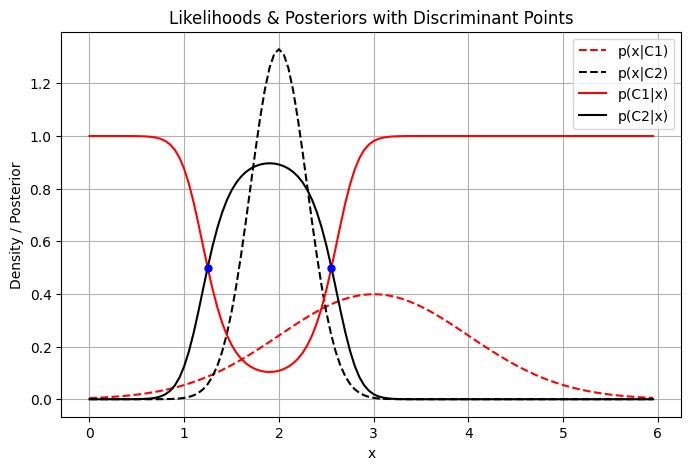

In [34]:
def ex4_6(mu1, sigma1, p1, mu2, sigma2, xrange):
  '''
  Plot the likelihood and posterior probabilities for two classes
    and plot the discrminant points.
  Inputs:
  - mu1: a real number specifying the mean of Gaussian distribution p(x|C1)
  - sigma1: a real number specifying the standard deviation of Gaussian distribution p(x|C1)
  - p1: a real number in [0, 1] specifying the prior probability of C1, i.e., P(C1)
        P(C2) will be automatically inferred by 1 - p1.
  - mu2: a real number specifying the mean of Gaussian distribution p(x|C2)
  - sigma2: a real number specifying the standard deviation of Gaussian distribution p(x|C2)
  - xrange: a 1-D numpy array specifying the range of x to evaluate likelihood and posterior
  Outputs:
    Nil
  '''

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  l1, post1, l2, post2 = comp_posterior(mu1, sigma1, p1, mu2, sigma2, xrange)
  plt.figure(figsize=(8,5))
  plt.plot(xrange, l1, linestyle='--', color='red',  label='p(x|C1)')
  plt.plot(xrange, l2, linestyle='--', color='black', label='p(x|C2)')
  plt.plot(xrange, post1, linestyle='-', color='red',  label='p(C1|x)')
  plt.plot(xrange, post2, linestyle='-', color='black', label='p(C2|x)')
  x1, x2 = find_dpoint(mu1, sigma1, p1, mu2, sigma2)
  xs = np.array([x1, x2])
  l1_x = nrmf(xs, mu1, sigma1)
  l2_x = nrmf(xs, mu2, sigma2)
  px_x = l1_x * p1 + l2_x * (1 - p1)
  post1_x = (l1_x * p1) / px_x
  plt.plot(xs, post1_x, 'o', color='blue', markersize=5)
  plt.title('Likelihoods & Posteriors with Discriminant Points')
  plt.xlabel('x')
  plt.ylabel('Density / Posterior')
  plt.grid(True)
  plt.legend(loc='best')
  plt.show()

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

mu1 = 3.0
sigma1 = 1.0
p1 = 0.4
mu2 = 2.0
sigma2 = 0.3
xrange = np.arange(0,6,0.05)

ex4_6(mu1, sigma1, p1, mu2, sigma2,  xrange)

## Problem 4: Exercise 4.7 of Alpaydin (0 pts) {-}

Assume a linear model and then add 0-mean Gaussian noise to generate a
sample. Divide your sample into two as training and validation sets. Use
linear regression using the training half. Compute error on the validation set.
Do the same for polynomials of degrees 2 and 3 as well. You may find **np.polyfit()** is useful.

The code has been fully proivded and you are expected to digest it fully.  Also play with the code to try anything you like.  There is nothing to submit for this question.

In [35]:
def ex4_7(nSample, n_train, degree):
  """
  Inputs:
  - degree: List, degree list of polynoimial function.
  - nSample: Integer, number of samples you want to draw
  - n_train: Integer, number of samples in the training set

  Output:
  - error: List, error of different degrees on validation set
  """

  #generate samples
  np.random.seed(1)
  # X = np.arange(nSample)
  X = np.random.rand(nSample)
  Y = X + np.random.standard_normal(nSample)

  #split samples into training set and validation set
  order = np.random.permutation(len(X))
  X_train = X[order[:n_train]]
  Y_train = Y[order[:n_train]]
  X_test = X[order[n_train:]]
  Y_test = Y[order[n_train:]]

  error = np.zeros_like(degree)

  for d in degree:
  #train fit
    A = np.polyfit(X_train, Y_train, d)
    Y_predict = np.zeros_like(Y_test)

    #compute the error
    for i in range(len(A)):
      Y_predict += A[i]*np.power(X_test, d-i)

    error = np.power((Y_predict-Y_test),2)
    error[d] = (1.0/(2*nSample)) * error.sum(axis=0)
    print ('The error of polynoimial degree {degree} : {error}'.format(degree = d, error= error[d]))
  return error

nSample = 100
n_train = 50
degree = [1, 2, 3]
error = ex4_7(nSample, n_train, degree)

The error of polynoimial degree 1 : 0.15729588561964697
The error of polynoimial degree 2 : 0.17362323411204414
The error of polynoimial degree 3 : 0.17600437231468838


## Problem 5: Exercise 5.2 of Alpaydin (32 pt) {-}

Generate a sample from a 2-dimensional normal density $N(\mu,\Sigma)$, calculate $m$ and $S$, and compare them with $\mu$ and $\Sigma$. Check how your estimates change as the sample size changes.

Specificially, draw $N = 10, 50, 500$ samples. For each value of $N$, generate a scatter plot of the samples drawn.  On each plot, also include a contour of the original density $N(\mu,\Sigma)$.

### 5.1 Implement the function that computes the density of a multi-variate Gaussian distribution (9 pt)


In [36]:
def mvar(x, mu, Sigma):
  '''
    Computes the density function of a multi-variate Gaussian distribution
      with mean mu and covariance matrix Sigma, evaluated at x.
    This is the multi-variate version of nrmf.
    Different from nrmf, x encodes a single location only.

    Inputs:
    - x: 1-D numpy array specifying the single position where the probability density is queried (num_dimension)
    - mu: 1-D numpy array specifying the mean of 2-dimensional normal density (num_dimension)
    - Sigma: 2-D numpy array specifying the covariance of 2-dimensional normal density (num_dimension, num_dimension)
    Outputs:
    - p: a real number specifying the probability density of x
  '''

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  x = np.asarray(x)
  mu = np.asarray(mu)
  Sigma = np.asarray(Sigma)
  k = x.shape[0]
  diff = x - mu
  inv_S = np.linalg.inv(Sigma)
  det_S = np.linalg.det(Sigma)
  norm_const = 1.0 / (np.power(2*np.pi, k/2) * np.sqrt(det_S))
  exponent = -0.5 * (diff.T @ inv_S @ diff)
  p = float(norm_const * np.exp(exponent))

  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  return p

"""
Unit test:
should print: p = 0.011828135195080136
"""
Sigma = np.array([[1, -1],
           [-1, 5]])

mu = np.array([1.5, 2])
x = np.array([3, 3])
p = mvar(x, mu, Sigma)
print(p)

0.011828135195080136


### 5.2 Create the meshgrid to plot the contour for the density function (9 pt) {-}

Given a range of $x$ and $y$ values (both as a vector), create a mesh grid as their cross product.  Most parts of the function have been done for you, and you will only need to implement one line of code that evaluates the Gaussian density using the `mvar` function.  Read the code carefully and digest the `meshgrid` function.  It will be very important for plotting 2-variable functions.

You may look at the code in Section 5.4 below and see how to make `comp_density_grid` compatible with its application there.  As such, we are not providing a test case here, but you should make sure that the results in Section 5.4 look reasonable.

In [37]:
def comp_density_grid(x, y, mu, Sigma):
  '''
  Generate the meshgrid of plotting the 2-variable Gaussian density function
  Inputs:
    - x: 1-D numpy array specifying the ticks of x-axis
    - y: 1-D numpy array specifying the ticks of y-axis
    - mu: 1-D numpy array specifying the mean of 2-dimensional normal density (num_dimension)
    - Sigma: 2-D numpy array specifying the covariance of 2-dimensional normal density (num_dimension, num_dimension)
  Outputs:
    - X: shaped x by using np.meshgrid (len(y), len(x))
    - Y: shaped y by using np.meshgrid (len(y), len(x))
    - f: 2-D numpy array specifying the probability density of 2-variable Gaussian density (len(y), len(x))
  '''
  X, Y = np.meshgrid(x, y)  # Both X and Y are shaped (len(y), len(x))
  len_x = np.size(x)
  len_y = np.size(y)
  f = np.empty([len_y, len_x])

  for i in range(len_x):
    for j in range(len_y):
      # Next we need to assign the values for the f matrix
      # It is quite tricky. Check out
      # Manual: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
      # Pay attention to the 'notes' section in the manual page.
      # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
      f[j, i] = mvar(np.array([X[j, i], Y[j, i]]), mu, Sigma)

      # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return X, Y, f

### 5.3  Draw samples from a multivariate Gaussian and re-estimate its parameters (9 pt) {-}

To draw a sample from an $n$-dimensional Gaussian $N(\mu, \Sigma)$, one needs to take the following steps:

1. Perform a Cholesky decomposition on $\Sigma$, i.e., find an $n$-by-$n$ upper-triangular matrix $R$ such that $R^T R = \Sigma$.  Since $\Sigma$ is positive semi-definite, there must be such a real-valued matrix $R$.

2. Draw $n$ number of iid samples from $N(0,1)$ using `np.random.standard_normal`. Stack them together into an $n$-dimensional vecotr $x$.

3. Output a sample computed by $R^\top x + \mu$.

The function `sample_multivariate_normal` should first loop over steps 1-3 to draw $N$ samples, and then use these samples to estimate the mean and covariance matrix of the Gaussian.

Now implement this procedure.  You code should not import any module and can directly call `scipy.linalg.cholesky`.

In [50]:
def sample_multivariate_normal(mu, Sigma, N):
  '''
  Draw samples from a multivariate Gaussian and then re-estimate its mean and covariance
  Inputs:
    - mu: 1-D numpy array specifying the mean of 2-dimensional normal density (num_dimension)
    - Sigma: 2-D numpy array specifying the covariance of 2-dimensional normal density (num_dimension, num_dimension)
    - N: Integer, the number of samples (num_sample)
    ...
  Outputs:
    - sample: 2-D numpy array of drawn samples from a multivariate Gaussian (num_sample, num_dimension)
    - mean: 1-D numpy array specifying the mean of drawn samples (num_dimension)
    - cov: 2-D numpy array specifying the covariance of drawn samples (num_dimension, num_dimension)
  '''
  np.random.seed(1)
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  # np.random.seed(1)
  # mu = np.asarray(mu)
  # Sigma = np.asarray(Sigma)
  # d = mu.shape[0]
  # R = scipy.linalg.cholesky(Sigma, lower=False)
  # z = np.random.standard_normal((N, d))
  # sample = z @ R + mu
  # mean = sample.mean(axis=0)
  # cov = np.cov(sample, rowvar=False, bias=False)
  R = scipy.linalg.cholesky(Sigma, lower=False)
  dim = len(mu)
  z = np.random.standard_normal((N, dim))
  sample = z @ R.T + mu
  mean = np.mean(sample, axis=0)
  cov = np.cov(sample, rowvar=False)
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  return sample, mean, cov

  '''
  Unit test:
  It is slightly difficult to test the implementation because the result is random.
  Depending on your implementation, it is hard to specify a "correct" answer.
  So one way to check is to draw a large number of samples (e.g., N = 10000),
  then estimate the mean and covariance from it.
  Finally, compare them with the input arguments mu and Sigma.
  You can implement this test yourself, and the auto-grader will do exactly this.
  '''

mu = np.array([1, 2])
Sigma = np.array([[2, 0.8],
                  [0.8, 1]])
sample, mean_est, cov_est = sample_multivariate_normal(mu, Sigma, 10000)
print("Estimated mean:\n", mean_est)
print("Estimated covariance:\n", cov_est)

Estimated mean:
 [1.02583646 2.00129044]
Estimated covariance:
 [[2.31232053 0.44269572]
 [0.44269572 0.67270197]]


### 5.4  Generate contours of Gaussian densities and samples (5 pt){-}

1. Generate contours of Gaussian densities,
2. Draw $N$ samples from it,
3. Estimate the mean and covariance based on the $N$ samples,
4. Generate the contour of the estimated Gaussian.

We will vary $N = 10, 50, 500$.  The code has been done for you, and you should carefully and thoroughly comprehend it.  In particular, see how the `contour` function is used.  Your implementation in the previous steps should make the plots here reasonable.  There is no code to submit for this step.

Discuss briefly what observations you can make from the plots.

<font color='red'> My observation is : (type the result here)</font>


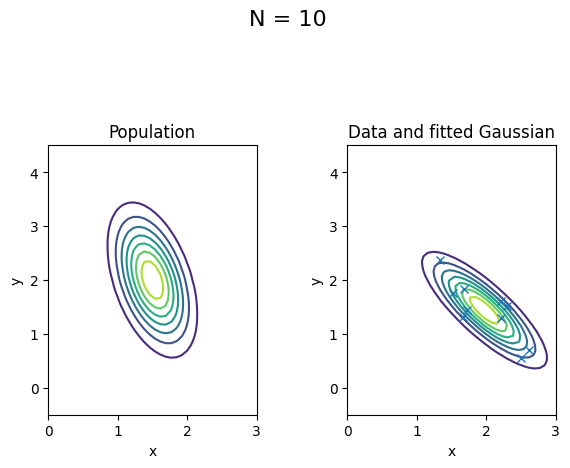

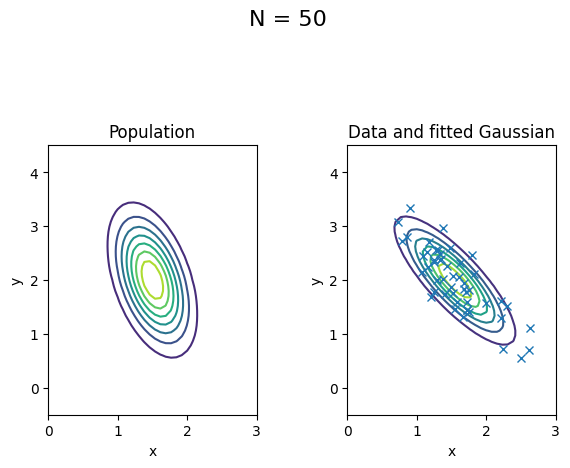

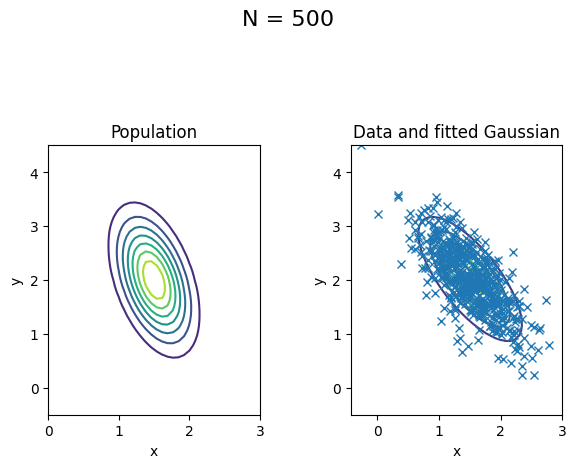

In [39]:
def ex5_2(Nlist):
  np.random.seed(1)
  Sigma = np.array([[0.1, -0.1],
           [-0.1, 0.5]])

  m = np.array([1.5, 2])
  x = np.linspace(0, 3, 40)
  y = np.linspace(-0.5, 4, 50)

  for N in Nlist:

    # Generate contours of Gaussian densities
    # This subplot is the same for different values of N.
    X, Y, f = comp_density_grid(x, y, m, Sigma)
    fig = plt.figure()
    fig.suptitle(f"N = {N}", va='bottom', fontsize=16)
    ax1 = fig.add_subplot(121)    # Digest the syntax here
    ax1.title.set_text('Population')
    ax1.contour(X, Y, f)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_ylim(-0.5,4.5)

    ax2 = fig.add_subplot(122)
    ax2.title.set_text('Data and fitted Gaussian')
    # Draw N samples from the Gaussian,
    # and estimate the mean and covariance based on these samples.
    dta, mean, cov = sample_multivariate_normal(m, Sigma, N)

    # Generate the contour of the estimated Gaussian.
    X, Y, f = comp_density_grid(x, y, mean, cov)
    ax2.contour(X, Y, f)

    ax2.plot(dta[:,0], dta[:,1], 'x')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_ylim(-0.5,4.5)
    plt.tight_layout()


    plt.tight_layout(pad=3)
    plt.show()

N = [10, 50, 500]
ex5_2(N)

### Observation:
The population contour (left) is an ellipse tilted in an ellipse formation indicating a negatively correlation (since the off-diagonal of the covariance matrix is −0.1).

Its longest axis slopes downward such that as x increases, y decreases.

As (N) (the number of samples) increases, the fitted Gaussian (right) gets closer to the population ellipse in both center (mean) and shape/orientation ( covariance matrix).

This demonstrates the law of large numbers - the sample mean and covariance are consistent estimators of the true parameter.

For (N = 10):

The fitted ellipse is quite noisy; the mean is noticeably shifted and the ellipse is mis-rotated or mis-stretched in comparison to the population.

With so few samples, outliers overly influence the estimates.

For (N = 50):

The center aligns better and the shape of the ellipse population, though, small deviations remain.

Stability of estimation improved a lot in comparison to (N = 10).

For (N = 500):

The fitted contour almost perfectly overlaps with the population ellipse.

The orientation (eigenvectors) and eccentricity (eigenvalues) of the estimated covariance are very close to true ones.

The sample mean also converged near ((1.5, 2)).

The decrease of the spread of the estimated mean behaves asymptotically as (O(1/sqrt{N})).

The decrease in the variance of the covariance estimate behaves asymptotically as (O(1/N)).

## Problem 6: Exercise 5.6 of Alpaydin (0 pt) {-}

Let us say in two dimensions, we have two classes with exactly the same mean. What type of boundaries can be defined?

Digest the code below and appreciate the four cases.
We plot in black the decision boundary where $p_1 - p_2 = 0$.
We assume $p(C_1) = p(C_2) = 0.5$.  We generate the contour plot of the likelihood $p(x|C_1)$ and $p(x|C_2)$ at the level of 1, in red and blue respectively.  There is no code to submit for this question.


In [40]:
def cal_likli_pos(x, y, m1, m2, sigma1, sigma2):
  '''
  Generate the meshgrid of plotting
      1) two Gaussian density functions of two variables (output f1, f2).
      2) the posterior probability of the two classes (p1, p2)
  Inputs:
    - x, y: 1-D numpy arrays to specify the x and y coordinates for plotting
    - m1, m2, sigma1, sigma2: the mean and covariance of the two Gaussians.
  '''
  X, Y = np.meshgrid(y, x)
  len_x = np.size(x)
  len_y = np.size(y)

  f1 = np.zeros((len_y, len_x))
  f2 = np.zeros((len_y, len_x))
  p1 = np.zeros((len_y, len_x))
  p2 = np.zeros((len_y, len_x))
  for i in range(len_y):
    for j in range(len_x):
        f1[i][j] = mvar(np.array([x[j], y[i]]), m1, sigma1)
        f2[i][j] = mvar(np.array([x[j], y[i]]), m2, sigma2)
        p1[i][j] = f1[i][j]/(f1[i][j]+f2[i][j])
        p2[i][j] = 1 - p1[i][j]

  return f1, f2, p1, p2

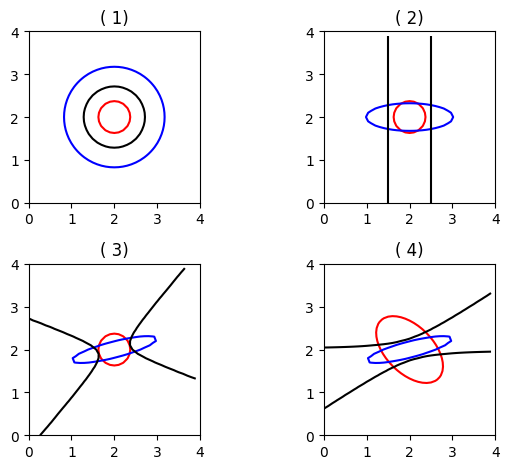

In [41]:
def ex5_6(mean, sg1, sg2):
  if (sg1.shape != sg2.shape):
    return 0
  x = np.arange(0, 4, 0.1)
  y = np.arange(0, 4, 0.1)
  n = sg1.shape[0]
  nrow = np.rint(np.sqrt(n)).astype(int)
  ncol = np.rint(np.sqrt(n)).astype(int)
  for i in range(n):
    f1, f2, p1, p2 = cal_likli_pos(x, y, mean, mean, sg1[i], sg2[i]) # cal_likli_pos as implemented in Problem 6
    plt.subplot(nrow,ncol, i+1)
    plt.title('({0:2d})'.format(i+1))
    plt.contour(x, y, f1, 1, colors='r')
    plt.contour(x, y, f2, 1, colors='b')
    plt.contour(x, y, p1-p2, 0, colors='k')   # plot the boundary of the two classes
    plt.xticks(np.arange(0, 5, step=1))
    plt.yticks(np.arange(0, 5, step=1))
    plt.gca().set_aspect('equal')

  plt.tight_layout()

mean = np.array([2.0,2.0])
sg1 = np.array([[[0.1,0],[0,0.1]],[[0.1,0],[0,0.1]],[[0.1,0],[0,0.1]],[[0.5,-0.25],[-0.25,0.5]]])
sg2 = np.array([[[1,0],[0,1]], [[1,0],[0,0.1]], [[1,0.25],[0.25,0.1]],[[1,0.25],[0.25,0.1]]])
ex5_6(mean, sg1, sg2)

## Problem 7: Based on Exercise 5.3 of Alpaydin  (15 pt){-}

Generate samples from two multivariate normal densities $N(\mu_i, \Sigma_i)$ ($i = 1, 2$), and use these samples to calculate the Bayes’ optimal discriminant for the four cases in Table 5.1. For simplicity, assume $N(\mu_i, \Sigma_i)$ is a 2-dimensional Gaussian density for both $i = 1$ and $2$.

We can consider $N(\mu_i, \Sigma_i)$ as the likelihood $p(x|C_i)$.  We will assume a uniform prior $p(C_1) = p(C_2) = 0.5$.  Our overall experiment is set up as follows.

1. Generate $N = 5$ samples from the given mean $N(\mu_i, \Sigma_i)$.

2. Estimate $\mu_i$ from the samples and denote the estimates as $mean_i$.

3. For $k$ = 4, 3, 2, 1 **(the construction of covariance estimate in the four cases will be covered by Section 7.1)**
  
     * If $k$ == 4, estimate the covariances $\Sigma_i$ as "Different, Hyperellipsoidal".  Denote the result as $cov_i$.  Refer to the last row of Table 5.1 of Alpaydin.

     * If $k$ == 3, estimate the covariances $\Sigma_i$ as "Shared, Hyperellipsoidal".  This shared covariance matrix can be computed as $(cov_1 + cov_2)/2$ based on the result of $k$ == 4.

     * If $k$ == 2, estimate the covariances $\Sigma_i$ as "Shared, Axis-aligned".  Denote the shared covariance matrix from $k=3$ as $S$. Then the new shared covariance matrix is just a diagonal matrix whose $(i,i)$-th entry is $S_{ii}$.  In other words, just set the off-diagonal entries of $S$ to 0.

     * If $k$ == 1, estimate the covariances $\Sigma_i$ as "Shared, Hyperspheric".  Denote the shared covariance matrix from $k=2$ as $S$. Then the new shared covariance matrix is just $a \cdot I$, where $I$ is the identity matrix and $a$ is the mean of the diagonal entries of $S$.

4. For $k$ = 4, 3, 2, 1

     * Plot the contour of the density of the two Gaussians with the estimated mean ($mean_i$) and covariance ($cov_i$ for $k = 4$, etc).

     * Plot the optimal discriminant (i.e., decision boundary) for the two classes, i.e., where $p(C_1 | x) = p(C_2 | x) = 0.5$.  You can use the same technique or code from Problem 6.

### 7.1 Compute the covariance estimation for the four different assumptions (10 pt){-}

We first implement the covariance matrix for the four cases in the function `comp_CovList`.  It takes $cov_i$ from the standard estimation of the two Gaussians assuming they are different and hyperellipsoidal (see the case $k=4$ above); you can see how they are computed from the code in Section 7.2.  The output is two lists: `cov1List` and `cov2List`.  `cov1List` is a list of four entries, where `cov1List[k-1]` is the estimate of $\Sigma_1$ in the above case $k$.  Similarly for `cov2List`.

In [42]:
def comp_CovList(cov1, cov2):
  '''
  Implement the covariance matrix for the four cases
  Inputs:
  - cov1: the estimate of covariance matrix for the first Gaussian based on samples from it
  - cov2: the estimate of covariance matrix for the second Gaussian based on samples from it
         Note cov1 and cov2 are estimated separately, just like in the standard setting.
  Outputs:
    - cov1List: a list of four entries, where cov1List[k-1] is the estimate of Sigma_1 in the case k
    - cov2List: a list of four entries, where cov2List[k-1] is the estimate of Sigma_2 in the case k
  '''
  cov1List = list()
  cov2List = list()

  for k in range(4):
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    S_shared = 0.5 * (cov1 + cov2)
    S_axis = np.diag(np.diag(S_shared))
    a = np.mean(np.diag(S_axis))
    S_hyp = a * np.eye(cov1.shape[0])

    if k == 0:  # k=1: Shared, Hyperspheric
      cov1List.append(S_hyp)
      cov2List.append(S_hyp)
    elif k == 1:  # k=2: Shared, Axis-aligned
      cov1List.append(S_axis)
      cov2List.append(S_axis)
    elif k == 2:  # k=3: Shared, Hyperellipsoidal
      cov1List.append(S_shared)
      cov2List.append(S_shared)
    else:  # k=3 -> k=4: Different, Hyperellipsoidal
      cov1List.append(cov1)
      cov2List.append(cov2)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return cov1List, cov2List

### 7.2 Use `compCovList` to plot Gaussian likelihood and optimal discriminant. (5 pt){-}

The code has been provided. You should read and digest the code.  There is no code to submit.

Now consider which one of the four assumptions in Table 5.1 of Alpaydin is the best for our samples from the two Gaussians.  If it is not "Different, Hyperellipsoidal" ($k=4$), explain why we cannot benefit from such a high capacity model.  If it is not "Shared, Hyperspheric" ($k=1$), explain why it does not work well.

<font color='red'> My observation is: (type the result here)</font>


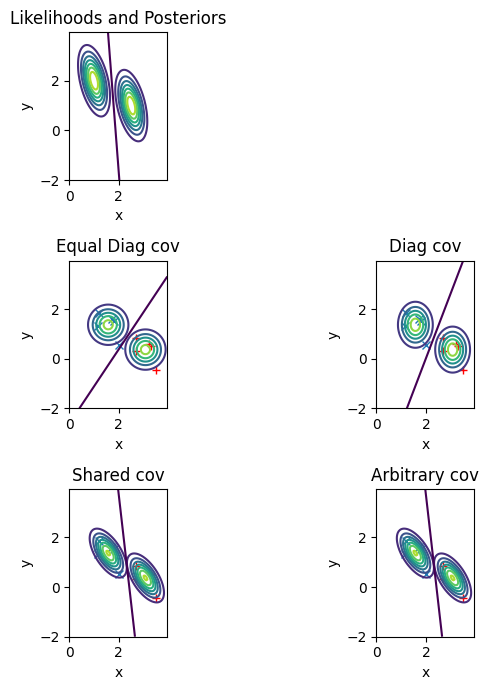

In [43]:
def ex5_3():
  np.random.seed(1)

  mu1 = np.array([1, 2])
  sigma1 = np.array([[0.1, -0.1],
          [-0.1, 0.5]])
  mu2 = np.array([2.5, 1])
  sigma2 = sigma1

  min_x, max_x = (0, 4)
  min_y, max_y = (-2, 4)

  #xrange and yrange are the range for plotting
  xrange = np.arange(min_x, max_x, step=1)
  yrange = np.arange(min_y, max_y, step=1)
  x = np.arange(min_x, max_x, 0.05)
  y = np.arange(min_y, max_y, 0.05)

  f1, f2, p1, p2 = cal_likli_pos(x, y, mu1, mu2, sigma1, sigma2)
  plt.figure(figsize=(7,7))
  plt.subplot(3,2,1)
  plt.contour(x, y, f1)
  plt.contour(x, y, f2)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Likelihoods and Posteriors')
  plt.contour(x, y, p1-p2, levels=[0])
  plt.gca().set_aspect('equal')

  #Sample from populations
  N = 5
  dta1, mean1, cov1 = sample_multivariate_normal(mu1, sigma1, N)
  dta2, mean2, cov2 = sample_multivariate_normal(mu2, sigma2, N)

  cov1List, cov2List = comp_CovList(cov1, cov2)

  for k in range(4):
    if k == 3:
      plt.subplot(3,2,6)
      title = 'Arbitrary cov'
    elif k == 2:
      plt.subplot(3,2,5)
      title = 'Shared cov'
    elif k == 1:
      plt.subplot(3,2,4)
      title = 'Diag cov'
    else:
      plt.subplot(3,2,3)
      title = 'Equal Diag cov'

    plt.xlabel('x')
    plt.ylabel('y')

    # Plot the samples dta1 using 'x'
    plt.plot(dta1[:,0], dta1[:,1], 'x')
    # Plot the samples dta1 using '+r'
    plt.plot(dta2[:,0], dta2[:,1], '+r')

    f1, f2, p1, p2 = cal_likli_pos(x, y, mean1, mean2, cov1List[k], cov2List[k])
    # Plot the contour of f1 and f2
    plt.contour(x, y, f1)
    plt.contour(x, y, f2)
    # Plot the decision boundary
    plt.contour(x, y, p1-p2, levels=[0])

    plt.gca().set_aspect('equal')
    plt.title(title)

  plt.tight_layout()

ex5_3()


<div style="page-break-after: always;"></div>


<div style="page-break-before: always;"></div>


<div style="height:800px"></div>


###Observation
The two populations were generated with the same full covariance (oblique ellipses) but different means.

With equal covariances, the Bayes-optimal boundary is linear.

Among the four assumptions, the plot that best matches the population/posterior figure is k = 3 → Shared, Hyperellipsoidal.

It preserves the orientation and elongation (off-diagonal correlation) of the ellipses and, because the covariances are shared, it yields an almost straight decision boundary, consistent with the Bayes rule.

k = 4 (Different, Hyperellipsoidal)?

With only N = 5 samples per class, estimating two separate full covariance matrices has too much capacity for the available data. The estimates of Σ₁ and Σ₂ fluctuate widely (high variance), so the learned boundary may tilt or bend unnaturally and overfit the few samples instead of reflecting the common shape.

In short: higher capacity → higher variance → worse generalization.

k = 1 (Shared, Hyperspheric)?

This assumption is too restrictive. A spherical covariance ignores both scale differences across axes and correlations (off-diagonal terms).

The fitted likelihoods become circles, so the boundary is forced to have the wrong slope/position that doesn’t match the rotated data.

The bias is high, and the boundary is clearly misaligned.

k = 2 (Shared, Axis-Aligned)?

An improvement over spherical as it retains distance, d.


# Submission Instruction {-}

You're almost done! Take the following steps to finally submit your work.

1. After executing all commands and completing this notebook, save your `Lab_4.ipynb` as a PDF file, named as `X_Y_UIN.pdf`, where `X` is your first name, `Y` is your last name, and `UIN` is your UIN. Make sure that your PDF file includes all parts of your solution, including the plots.

> * Print out all unit test case results before printing the notebook into a PDF.
* If you use Colab, open this notebook in Chrome.  Then File -> Print -> set Destination to "Save as PDF".  If the web page freezes when printing, close Chrome and reopen the page. If Chrome doesn't work, try Firefox.
* If you are working on your own computer, we recommend using the browser (not jupyter) for saving the PDF. For Chrome on a Mac, this is under *File->Print...->Open PDF in Preview*. When the PDF opens in Preview, you can use *Save...* to save it.
* Sometimes, a figure that appears near the end of a page can get cut.  In this case, try to add some new lines in the preceding code block so that the figure is pushed to the beginning of the next page. Or insert some text blocks.

2. Upload `X_Y_UIN.pdf` to Gradescope under `Lab_4_Written`.

3. A template of `Lab_4.py` has been provided.  For all functions in `Lab_4.py`, copy the corresponding code snippets you have written into it, excluding the plot code.  **Do NOT** copy any code of plotting figures and do not import **matplotlib**.  This is because the auto-grader cannot work with plotting.  **Do NOT** change the function names.  

4. Zip `Lab_4.py` and `Lab_4.ipynb` (**2 files**) into a zip file named `X_Y_UIN.zip`. Suppose the two files are in the folder `Lab_4`.  Then zip up the **two files inside the `Lab_4` folder**.  **Do NOT zip up the folder `Lab_4`** because the auto-grader cannot search inside a folder. Submit this zip file to Gradescope under `Lab_4_Code`.

5. The autograder on Gradscope will be open all the time. We designed some simple test cases to help you check wehther your functions are executable. You will see the results of running autograder once you submit your code. Please follow the error messages to debug. Since those simple test cases are designed for debugging, it does not guaranttee your solution will work well on the real dataset. It is your responsibility to make your code logically correct. Since all functions are tested in batch, the autograder might take a few minutes to run after submission.

<font color='red'>If you *only* try to get real-time feedback from auto-grader, it will be fine to just upload `Lab_4.py` to `Lab_4_Code`</font>.  However, the final submission for grading should still follow the above point 4.

You can submit to Gradescope as often as you like. We will only consider your last submission before the deadline.

<div style="height:800px"></div>
